In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv(r"C:\Users\ibast\Downloads\weight height csv.zip")

In [70]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df.shape

(10000, 3)

In [6]:
pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

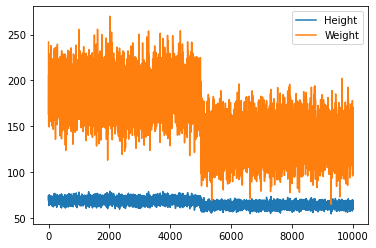

In [10]:
df.plot()

<AxesSubplot:xlabel='Weight', ylabel='Count'>

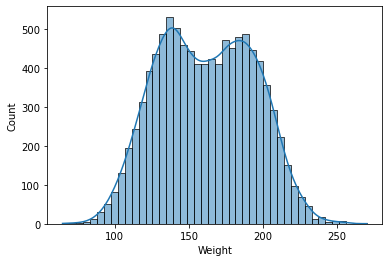

In [13]:
sb.histplot(df["Weight"],kde=True)

<AxesSubplot:xlabel='Height', ylabel='Count'>

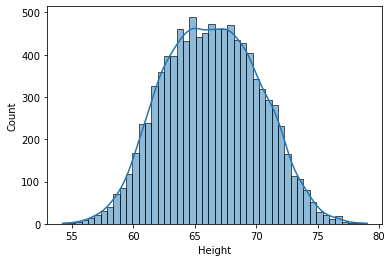

In [14]:
sb.histplot(df["Height"],kde=True)

In [17]:
mean_value=df["Weight"].mean()
print (mean_value)

161.44035683283076


In [18]:
std_value=df["Weight"].std()
print (std_value)

32.108439006519546


In [21]:
# for standard devision 3 layer 
std_3=mean_value+(3*std_value)
print(std_3)

257.7656738523894


In [22]:
# for minus standard devision 3 layer
std_3minus=mean_value-(3*std_value)
print(std_3minus)

65.11503981327212


In [24]:
#not to find out any number out of std 3 
df[df["Weight"]>std_3]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [26]:
df[df["Weight"]<std_3minus]

,Gender,Height,Weight
9285,Female,54.263133,64.700127


In [30]:
# if we will calculate 2.5 std we will get more data as outlier 
std_2=mean_value+(2.5*std_value)
print(std_2)
std_2minus=mean_value-(2.5*std_value)
print(std_2minus)
df[df["Weight"]>std_2]
df[df["Weight"]<std_2minus]

241.7114543491296
81.16925931653189


,Gender,Height,Weight
5360,Female,55.668202,68.982530
5740,Female,56.108902,80.531259
6624,Female,54.616858,71.393749
6982,Female,56.764456,79.174376
7294,Female,54.873728,78.606670
7935,Female,58.211650,77.523774
8241,Female,56.167299,77.898559
9285,Female,54.263133,64.700127
9566,Female,57.353093,72.750145


In [37]:
merge=df[(df["Weight"]>std_2)|(df["Weight"]<std_2minus)]

In [38]:
merge.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283


In [40]:
merge.shape

(27, 3)

In [42]:
merge1=df[(df["Weight"]>std_2)>(df["Weight"]<std_2minus)]
print(merge1)

     Gender     Height      Weight
0      Male  73.847017  241.893563
994    Male  78.095867  255.690835
1506   Male  75.698618  249.565628
1610   Male  76.617546  255.863326
1750   Male  74.604668  249.946283
1896   Male  76.472880  246.232321
2014   Male  78.998742  269.989699
2070   Male  77.465569  252.556689
2971   Male  75.156879  250.317151
3228   Male  76.268668  247.386741
3285   Male  78.528210  253.889004
3669   Male  77.008336  251.425051
3757   Male  78.621374  245.733783
3909   Male  77.067355  249.110242
3918   Male  76.537161  243.267497
4077   Male  74.976953  248.848873
4331   Male  76.848761  254.209073
4569   Male  77.547186  242.041173


In [45]:
merge2=df[(df["Weight"]<std_2)>(df["Weight"]<std_2minus)]
print (merge2.shape)

(9973, 3)


In [47]:
remove_out_column=df[(df["Weight"]<std_2)&(df["Weight"]<std_2minus)]
print(remove_out_column.shape)

(9, 3)


<AxesSubplot:xlabel='Weight', ylabel='Count'>

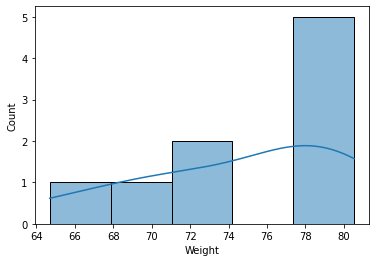

In [55]:
sb.histplot(remove_out_column["Weight"],kde=True)

In [52]:
remove_out_column1=(df["Weight"])-(df[(df["Weight"]<std_2)&(df["Weight"]<std_2minus)])
print(remove_out_column1.shape)

(9, 10003)


<AxesSubplot:xlabel='Weight', ylabel='Count'>

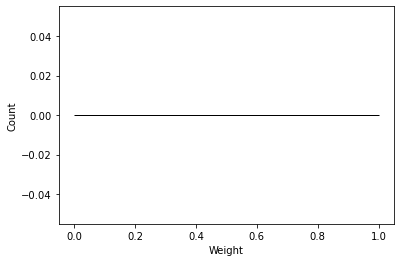

In [56]:
sb.histplot(remove_out_column1["Weight"],kde=True)

In [68]:
#NOW FOR GENDER WE USE ONE HOT ENCODING 
dummy_variables=pd.get_dummies(remove_out_column["Gender"],drop_first=True)

In [69]:
dummy_variables.head()

""
5360
5740
6624
6982
7294


In [65]:
new_df=remove_out_column.drop("Gender",axis=1)

In [66]:
new_df.head()

,Height,Weight
5360,55.668202,68.982530
5740,56.108902,80.531259
6624,54.616858,71.393749
6982,56.764456,79.174376
7294,54.873728,78.606670


In [72]:
df=pd.concat([new_df,dummy_variables],axis=1)

In [73]:
df.head()

,Height,Weight
5360,55.668202,68.982530
5740,56.108902,80.531259
6624,54.616858,71.393749
6982,56.764456,79.174376
7294,54.873728,78.606670


### NOW LINEAR REGRASSION PREDICT Y=MX+C


In [75]:
x=df.drop("Height",axis=1)
y=df["Height"]

In [77]:
x

,Weight
5360,68.982530
5740,80.531259
6624,71.393749
6982,79.174376
7294,78.606670
7935,77.523774
8241,77.898559
9285,64.700127
9566,72.750145


In [78]:
y

5360    55.668202
5740    56.108902
6624    54.616858
6982    56.764456
7294    54.873728
7935    58.211650
8241    56.167299
9285    54.263133
9566    57.353093
Name: Height, dtype: float64

In [81]:
#LINEAR REGRESSION 
from sklearn.model_selection import train_test_split

In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=42)

In [85]:
xtrain.shape

(6, 1)

In [87]:
xtest.shape

(3, 1)

In [86]:
from sklearn.linear_model import LinearRegression

In [93]:
ire=LinearRegression()
ire.fit(xtrain,ytrain)

LinearRegression()

In [94]:
ire.coef_

array([0.03707725])

In [95]:
ire.intercept_

53.13385676821583

In [96]:
ire.predict(xtest)

array([55.53275982, 56.11973475, 56.00822545])

In [97]:
ire.score(xtest,ytest)

0.17155797285437113

In [98]:
from sklearn.metrics import mean_squared_error,r2_score


In [99]:
pred=ire.predict(xtest)

In [101]:
mean_squared_error(ytest,pred)

2.1557160825316486

In [102]:
r2_score(ytest,pred)

0.17155797285437113